In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_size = (100, 100)
batch_size = 32

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False ,
    rotation_range=10,         
    width_shift_range=0.1,    
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    'train_directory2',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    'train_directory2',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 524 images belonging to 4 classes.
Found 524 images belonging to 4 classes.


In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)      

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=20, validation_data=test_generator)

model.save('custom.h5')

Epoch 1/20
17/17 [==============================] - 15s 793ms/step - loss: 0.7503 - accuracy: 0.6908 - val_loss: 0.6551 - val_accuracy: 0.7099
Epoch 2/20
17/17 [==============================] - 13s 750ms/step - loss: 0.7040 - accuracy: 0.7137 - val_loss: 0.6544 - val_accuracy: 0.7328
Epoch 3/20
17/17 [==============================] - 13s 758ms/step - loss: 0.6576 - accuracy: 0.7042 - val_loss: 0.6709 - val_accuracy: 0.7195
Epoch 4/20
17/17 [==============================] - 13s 771ms/step - loss: 0.7292 - accuracy: 0.7156 - val_loss: 0.7417 - val_accuracy: 0.6985
Epoch 5/20
17/17 [==============================] - 13s 772ms/step - loss: 0.6835 - accuracy: 0.7214 - val_loss: 0.6760 - val_accuracy: 0.7347
Epoch 6/20
17/17 [==============================] - 13s 775ms/step - loss: 0.6424 - accuracy: 0.7214 - val_loss: 0.6291 - val_accuracy: 0.7615
Epoch 7/20
17/17 [==============================] - 13s 750ms/step - loss: 0.6711 - accuracy: 0.7424 - val_loss: 0.6210 - val_accuracy: 0.7557

c:\Users\kirti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


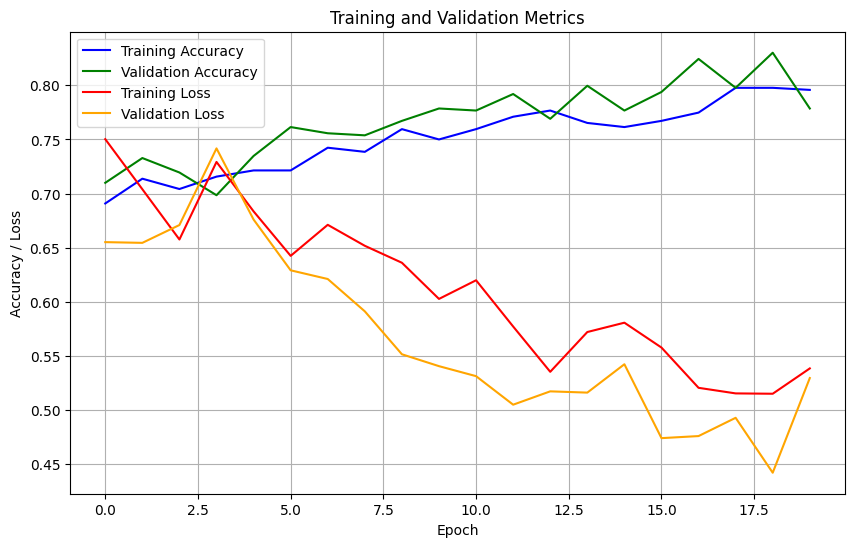

In [9]:
import matplotlib.pyplot as plt

# Plot all metrics on the same graph
plt.figure(figsize=(10, 6))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')

plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Training and Validation Metrics')
plt.legend()
plt.grid(True)
plt.show()